<a href="https://colab.research.google.com/github/ummagumm-a/EvolutionaryOptimizationAlgorithms/blob/main/MultiobjectiveOptimization_ParetoFront.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider the multi-objective optimization problem min{$f_1$, $f_2$}, where
$f_1(x_1, x_2) = x_1^2 + x_2$, and $f_2(x_1, x_2) = x_1 + x_2^2$, 
and $x_1$ and $x_2$ are both constrained to [—10, 10].

**a)** Calculate $f_1(x_1, x_2)$ and $f_2(x_1, x_2)$ for all allowable integer values of $x_1$ and $x_2$, and plot the points in ($f_1$, $f_2$) space (a total of $21^2$ = 441 points). Clearly indicate the Pareto front on the plot.

**b)** Given the resolution that you used in part (a), give a mathematical description of the Pareto set. Plot the Pareto set in ($x_1$, $x_2$) space.  

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import plotly.io as pio

pio.renderers.default = "svg"

In [3]:
import plotly.express as px
import numpy as np

Define functions $f_1$ and $f_2$.

In [4]:
f = lambda x1, x2: x1**2 + x2 
g = lambda x1, x2: x1 + x2**2

Calculate values of $f_1$ and $f_2$ for allowable range of $x_1$ and $x_2$.

In [5]:
fgs = []
for i in range(-10, 11):
    for j in range(-10, 11):
        fgs.append((i, j, f(i, j), g(i, j)))

fgs = np.array(fgs)
fgs

array([[-10, -10,  90,  90],
       [-10,  -9,  91,  71],
       [-10,  -8,  92,  54],
       ...,
       [ 10,   8, 108,  74],
       [ 10,   9, 109,  91],
       [ 10,  10, 110, 110]])

Visualize values of functions $f_1$ and $f_2$

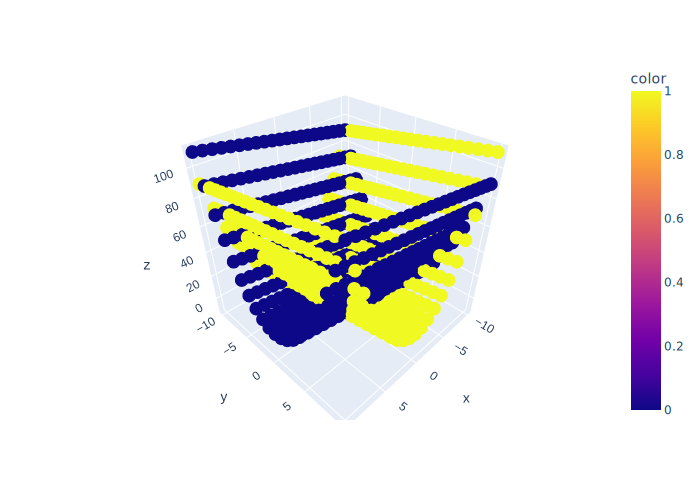

In [6]:
x = np.concatenate((fgs[:, 0], fgs[:, 0]), axis=0)
y = np.concatenate((fgs[:, 1], fgs[:, 1]), axis=0)
z = np.concatenate((fgs[:, 2], fgs[:, 3]), axis=0)
color = np.concatenate((np.ones(len(fgs)), np.zeros(len(fgs))), axis=0)
px.scatter_3d(x=x, y=y, z=z, color=color).show()

Create function that returns a list of Pareto-optimal points. They will represent the Pareto front.

Definition of Pareto optimality: ([from Wikipedia](https://en.wikipedia.org/wiki/Pareto_efficiency))

Then an allocation {$x_1,... ,x_n$}, where $x_i \in \mathbb {R} ^{k}$ for all i, is Pareto-optimal if there is no other feasible allocation {$x_1',... ,x_n'$}  where, for utility function $u_{i}$ for each agent $i$, $u_{i}(x_{i}')\geq u_{i}(x_{i})$ for all $i\in \{1,\dots ,n\}$ with $u_{i}(x_{i}')>u_{i}(x_{i})$ for some $i$.

In [7]:
def dominates(row_, rowCandidate_):
    row = np.array(row_[2:])
    rowCandidate = np.array(rowCandidate_[2:])
    return int(np.all(row <= rowCandidate) and np.any(row < rowCandidate))

def cull(pts, dominates):
    dominated = []
    cleared = []
    remaining = pts
    while remaining:
        candidate = remaining[0]
        new_remaining = []
        # Compare each other point with the candidate
        for other in remaining[1:]:
            # if the other point is dominated by the candidate - exclude it from
            # further calculations. Because it is not Pareto Optimal
            if dominates(candidate, other):
                dominated.append(other)
            else:
                new_remaining.append(other)

        # if candidate is not Pareto dominated by some other point - 
        # - add it to the list of Pareto optimal points.
        if not any(dominates(other, candidate) for other in new_remaining):
            cleared.append(candidate)
        else:
            # otherwise, exclude it from further calculations
            dominated.append(candidate)
        # remaining points are now points that aren't Pareto dominated
        # by the candidate
        remaining = new_remaining
        
    return cleared, dominated

cleared, dominated = cull(fgs.tolist(), dominates)
cleared, dominated = np.array(cleared), np.array(dominated)

Visualize all points in $(f_1, f_2)$ space indicating the Pareto front.

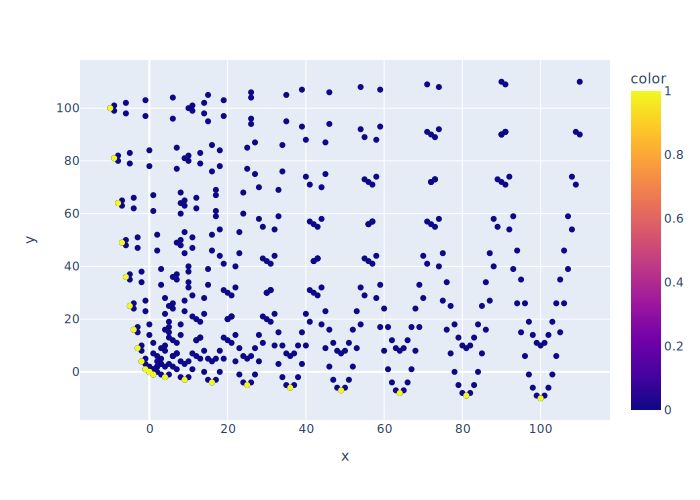

In [8]:
f1s = np.concatenate((fgs[:, 2], cleared[:, 2]), axis=0)
f2s = np.concatenate((fgs[:, 3], cleared[:, 3]), axis=0)
color = np.concatenate((np.zeros(len(fgs)), np.ones(len(cleared))))
px.scatter(x=f1s, y=f2s, color=color).show()

This is a visualization of Pareto optimal points in 3D space.

It shows that only values of $(x_1, x_2)$ where {$(x_1, x_2) | x_1 = 0 \land x_2 \leq 0 \lor x_1 \leq 0 \land x_2 = 0 \lor x_1 = -1 \land x_2 = -1$} are Pareto Optimal.



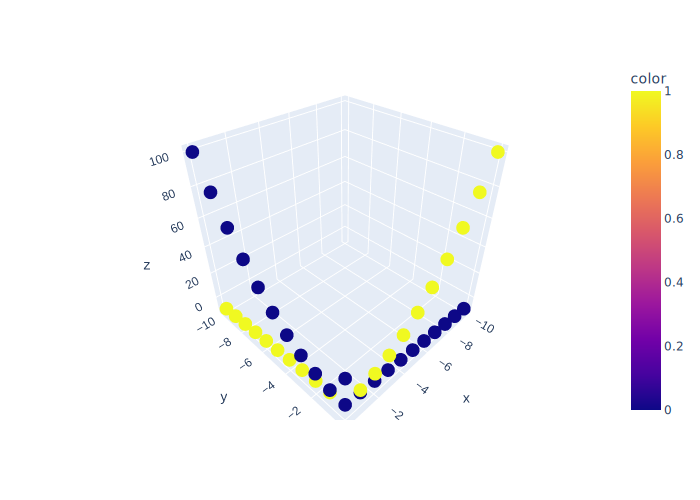

In [9]:
x = np.concatenate((cleared[:, 0], cleared[:, 0]), axis=0)
y = np.concatenate((cleared[:, 1], cleared[:, 1]), axis=0)
z = np.concatenate((cleared[:, 2], cleared[:, 3]), axis=0)
color = np.concatenate((np.ones(len(cleared)), np.zeros(len(cleared))), axis=0)
px.scatter_3d(x=x, y=y, z=z, color=color).show()